In [1]:
import os 
import pandas as pd

0.7936880641784609

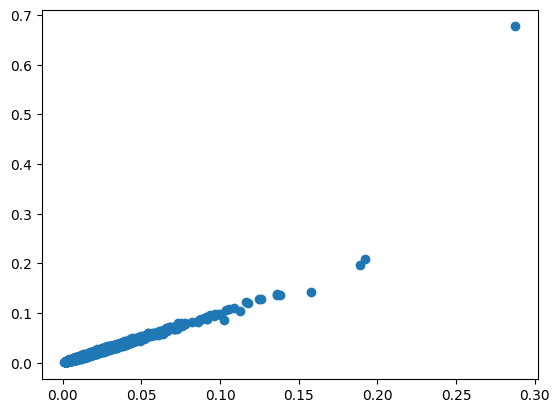

In [3]:
df = pd.read_csv("./predictions_holdout_trial003.csv")
df
import matplotlib.pyplot as plt 
plt.scatter(df["y_pred"] , df["y_true"])

from sklearn.metrics import r2_score
r2_score(df["y_pred"] , df["y_true"])

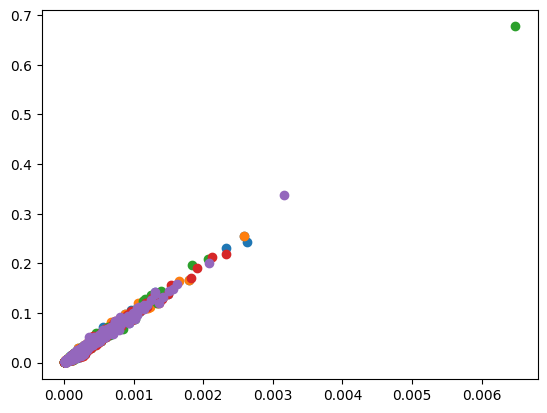

In [15]:
for i in range(1, 6):
    df4 = pd.read_csv(f"../trial_00{i}/predictions_holdout_trial00{i}.csv")
    # plt.scatter()
    plt.scatter(df4["Input"], df4["y_true"])


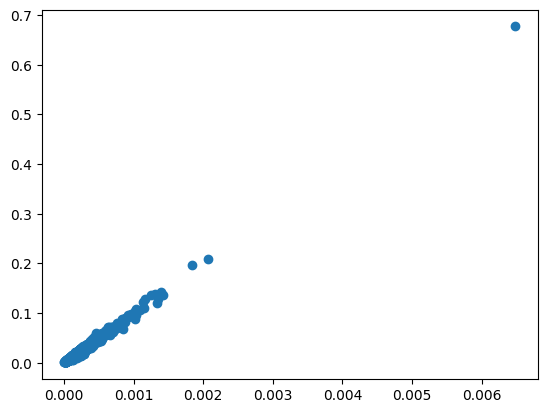

In [7]:
plt.scatter(df2["Input"], df2["y_true"])

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,AV_cm3_g,NAV_cm3_g,Has_OMS,name,Input,Output
0,1499489-acs.cgd.6b01265_1499490_clean,10.85017,3.77263,10.26663,0.884188,1701.53,1924.400,0.000,0.00000,0.6458,0.730388,0.0,0,1499489-acs.cgd.6b01265_1499490_clean,0.000350,0.032216
1,ACECIV_ion_b,3.59910,2.94934,3.57968,2.601950,0.00,0.000,21.213,8.15274,0.2312,0.088857,0.0,1,ACECIV_ion_b,0.000017,0.001554
2,ACOCOM_clean,24.60642,13.03430,24.60642,0.349927,1537.41,4393.520,0.000,0.00000,0.8630,2.466230,0.0,1,ACOCOM_clean,0.001147,0.114973
3,ACOCUS_clean,24.38417,13.22222,24.38417,0.346494,1518.48,4382.420,0.000,0.00000,0.8644,2.494710,0.0,1,ACOCUS_clean,0.001194,0.116946
4,ACODAZ_clean,23.29182,13.11646,23.29182,0.343144,1530.83,4461.210,0.000,0.00000,0.8618,2.511480,0.0,1,ACODAZ_clean,0.001183,0.116581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10184,ZUTBUN_clean,4.42995,3.86732,4.42995,2.282800,1037.92,454.670,0.000,0.00000,0.4626,0.202646,0.0,0,ZUTBUN_clean,0.000144,0.013258
10185,ZUVTEP_clean,6.34335,3.26541,6.34335,1.639520,0.00,0.000,911.464,555.93400,0.5300,0.323266,0.0,0,ZUVTEP_clean,0.000093,0.009801
10186,ZUWXUM_clean,6.25511,5.54572,6.22585,0.917254,2526.11,2753.990,0.000,0.00000,0.7012,0.764456,0.0,0,ZUWXUM_clean,0.000400,0.041085
10187,ZUXPOZ_clean,4.94280,4.31959,4.93372,2.001620,1314.33,656.635,0.000,0.00000,0.5790,0.289266,0.0,1,ZUXPOZ_clean,0.000124,0.009790


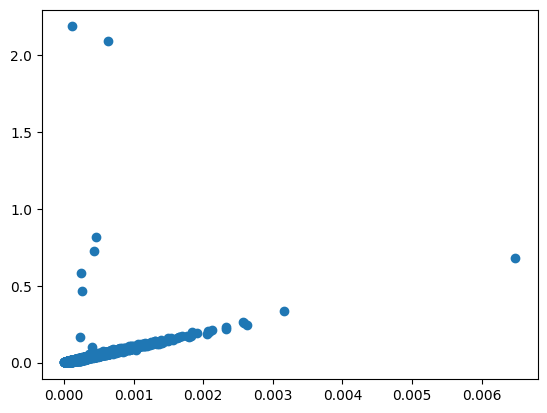

In [11]:
df3 = pd.read_csv("../../../../Data_collect/DataSet/He_273K/He_273K_He_273_0.01_to_He_273_1_dataset.csv")
plt.scatter(df3["Input"], df3["Output"])
df3


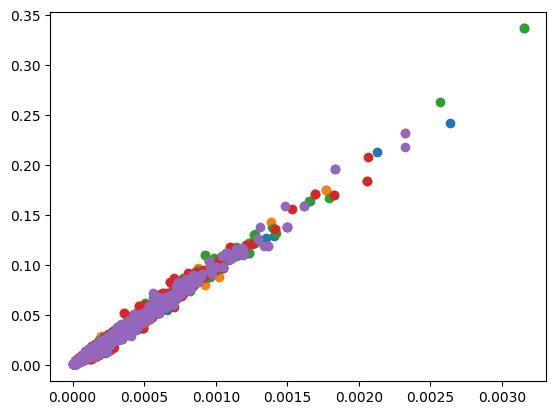

In [14]:
for i in range(1, 6):
    df4 = pd.read_csv(f"../../../try07_QT_LOGSAMPLE_struct+input_random/He_273_0.01_to_1__struct+input__random_struct__cat/trial_00{i}/predictions_holdout_trial00{i}.csv")
    # plt.scatter()
    plt.scatter(df4["Input"], df4["y_true"])


Removed 8 rows from mis_lis


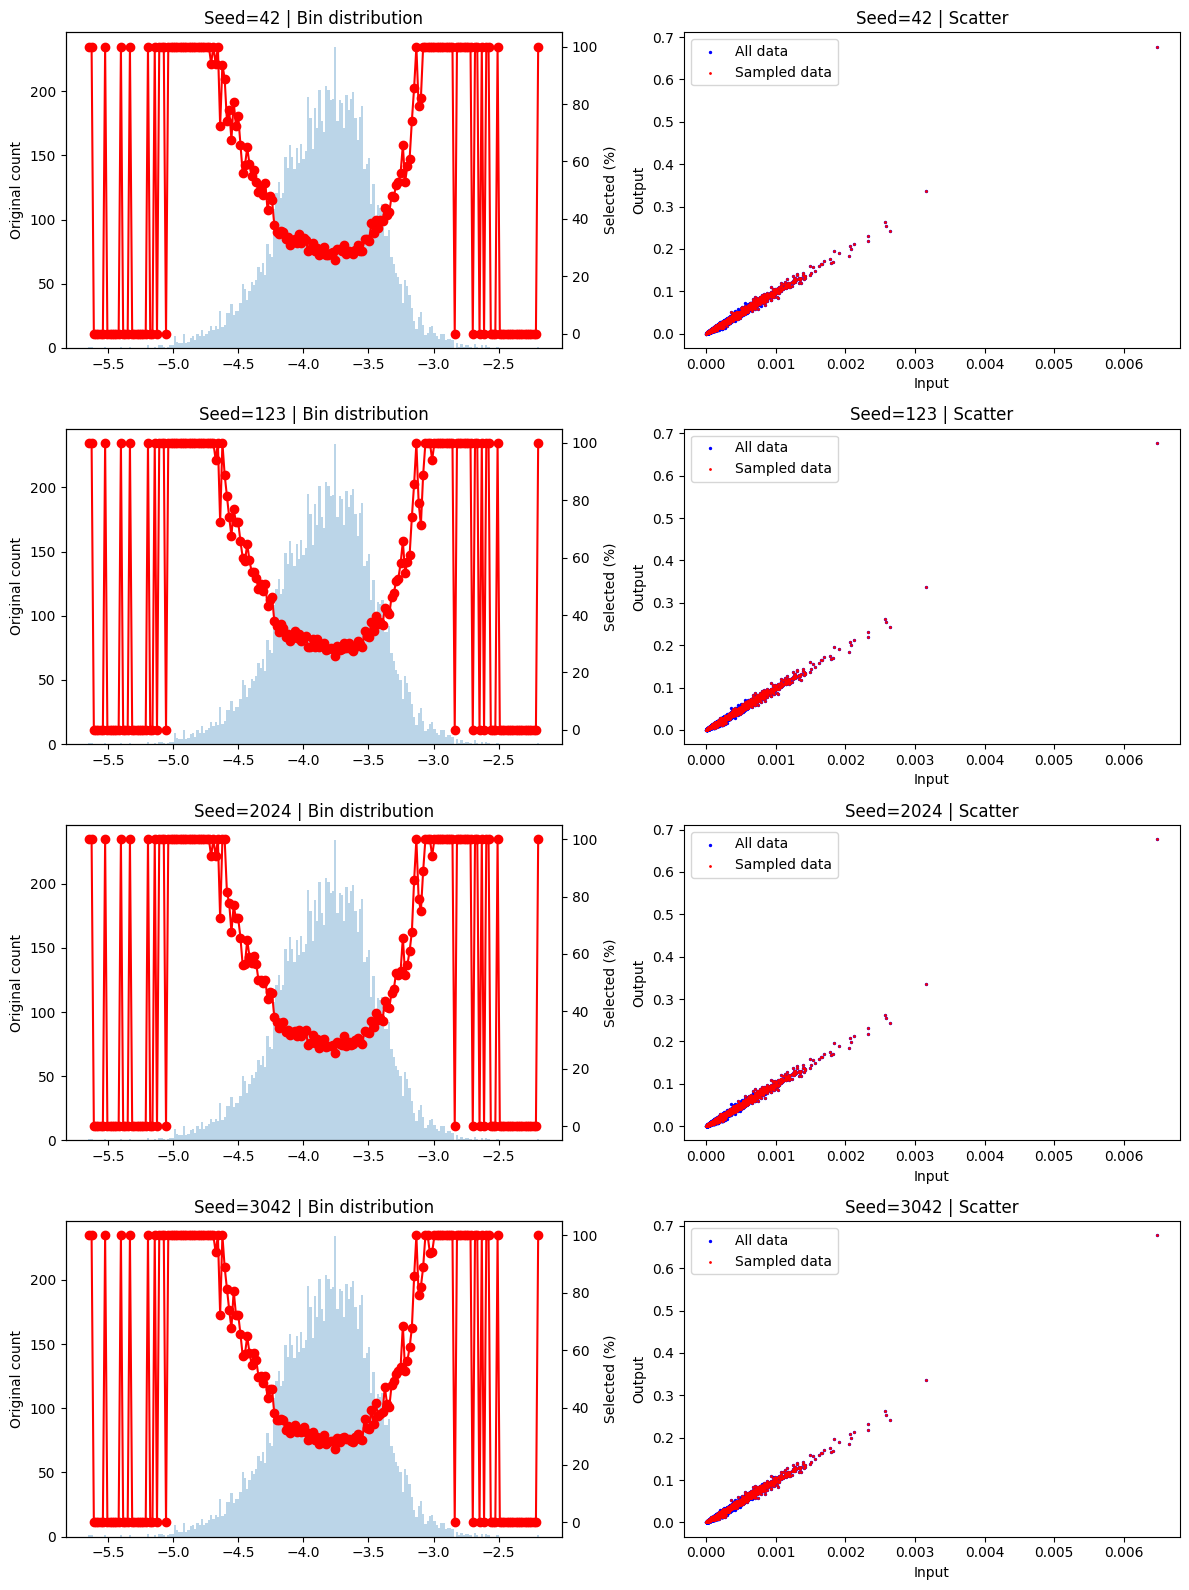

In [40]:
def quantile_weighted_sample(series_for_binning: pd.Series,
                             n_bins: int,
                             gamma: float,
                             n_samples: int,
                             seed: int,
                             return_stats: bool = False):
    """
    log10 transform on series_for_binning → uniform bins(min~max in log space)
    → quota ∝ (bin count)^gamma → without-replacement sampling in-bin.

    return_stats=True일 경우 bin별 count, quota, 실제 선택 개수를 함께 반환
    """
    rng = np.random.default_rng(seed)
    vals = series_for_binning.values.astype(float)
    idx  = series_for_binning.index.values
    n    = len(idx)
    if n == 0 or n_samples <= 0:
        return np.array([], dtype=idx.dtype)

    eps = 1e-12
    log_vals = np.log10(np.clip(vals, a_min=eps, a_max=None))

    vmin, vmax = float(log_vals.min()), float(log_vals.max())
    if vmin == vmax:
        chosen = rng.choice(idx, size=min(n_samples, n), replace=False)
        return (chosen, None) if return_stats else chosen

    edges   = np.linspace(vmin, vmax, n_bins + 1)
    bin_ids = np.digitize(log_vals, edges, right=False) - 1
    bin_ids = np.clip(bin_ids, 0, n_bins - 1)

    bin_to_idx = {b: idx[bin_ids == b] for b in range(n_bins)}
    counts     = np.array([len(bin_to_idx[b]) for b in range(n_bins)], dtype=float)

    valid = np.where(counts > 0)[0]
    weights = np.zeros_like(counts)
    weights[valid] = counts[valid] ** gamma
    wsum = weights[valid].sum()
    probs = weights / (wsum if wsum > 0 else 1.0)

    raw   = probs * n_samples
    quota = np.floor(raw).astype(int)
    deficit = int(n_samples - quota.sum())
    if deficit > 0:
        frac = raw - quota
        fsum = frac.sum()
        if fsum > 0:
            add_bins = rng.choice(np.arange(n_bins), size=deficit, replace=True, p=frac / fsum)
        else:
            add_bins = rng.choice(valid, size=deficit, replace=True)
        for b in add_bins:
            quota[b] += 1

    selected = []
    actual_selected = np.zeros_like(counts, dtype=int)
    for b in range(n_bins):
        k = int(quota[b])
        if k <= 0: continue
        pool = bin_to_idx.get(b, np.array([], dtype=idx.dtype))
        if len(pool) == 0: continue
        k = min(k, len(pool))
        chosen = rng.choice(pool, size=k, replace=False)
        selected.append(chosen)
        actual_selected[b] = len(chosen)

    if not selected:
        return np.array([], dtype=idx.dtype)
    sel = np.concatenate(selected)

    if len(sel) > n_samples:
        sel = sel[:n_samples]
    elif len(sel) < n_samples:
        remain = np.setdiff1d(idx, sel, assume_unique=False)
        if len(remain) > 0:
            add = rng.choice(remain, size=min(n_samples - len(sel), len(remain)), replace=False)
            sel = np.concatenate([sel, add])

    if return_stats:
        return sel, {
            "edges": edges,
            "counts": counts,
            "quota": quota,
            "actual": actual_selected
        }
    return sel


df = pd.read_csv("../../../../Data_collect/DataSet/He_273K/He_273K_He_273_0.01_to_He_273_1_dataset.csv")
mis_lis = ["BIWSEG_ion_b","LETQAE01_ion_b","VEWLAM_clean","ja406030p_si_007_manual","HIHGEM_manual","ja406030p_si_002_manual","POZHUI_ion_b","DONNAW01_SL",]
if "filename" in df.columns:
    before = len(df)
    df = df[~df["filename"].isin(mis_lis)].reset_index(drop=True)
    print(f"Removed {before - len(df)} rows from mis_lis")
seeds = [42, 123, 2024, 3042]  # 비교할 seed 값들
n_bins = 200
gamma = 0.5
sample_frac = 0.4

fig, axes = plt.subplots(len(seeds), 2, figsize=(12, 4*len(seeds)))

for i, seed in enumerate(seeds):
    sel_idx, stats = quantile_weighted_sample(
        df["Input"], n_bins=n_bins, gamma=gamma,
        n_samples=int(sample_frac*len(df)), seed=seed,
        return_stats=True
    )
    counts = stats["counts"]
    actual = stats["actual"]
    edges = stats["edges"]

    bin_centers = (edges[:-1] + edges[1:]) / 2
    pct_selected = np.divide(actual, counts, out=np.zeros_like(actual, dtype=float), where=counts>0)

    # --- (왼쪽) bin 분포 + 선택 비율 ---
    ax1 = axes[i, 0]
    ax1.bar(bin_centers, counts, width=(edges[1]-edges[0]), alpha=0.3, label="Original count")
    ax1_twin = ax1.twinx()
    ax1_twin.plot(bin_centers, pct_selected*100, 'r-o', label="% selected")
    ax1.set_ylabel("Original count")
    ax1_twin.set_ylabel("Selected (%)")
    ax1.set_title(f"Seed={seed} | Bin distribution")

    # --- (오른쪽) scatter plot ---
    ax2 = axes[i, 1]
    sel_df = df.loc[sel_idx]
    ax2.scatter(df["Input"], df["Output"], s=2, color="blue", label="All data")
    ax2.scatter(sel_df["Input"], sel_df["Output"], s=1, color="red", label="Sampled data")
    ax2.set_xlabel("Input")
    ax2.set_ylabel("Output")
    ax2.set_title(f"Seed={seed} | Scatter")
    ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
sel_df

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,AV_cm3_g,NAV_cm3_g,Has_OMS,name,Input,Output
9515,XEKDUO_clean,2.97586,2.74524,2.97586,1.90357,0.000,0.000,0.000000,0.000000,0.3280,0.172308,0.000000,1,XEKDUO_clean,0.000002,0.000277
1452,ACOLEL_clean,4.00255,2.78217,3.89811,1.45481,0.000,0.000,32.939300,22.641600,0.3540,0.243330,0.000000,1,ACOLEL_clean,0.000002,0.001036
7968,SOXHUI_SL,3.17946,2.67031,3.17946,1.45429,0.000,0.000,0.000000,0.000000,0.2700,0.185657,0.000000,0,SOXHUI_SL,0.000003,0.000429
1262,WIFGUP_clean,3.52324,2.85906,3.52324,2.30811,0.000,0.000,6.445250,2.792430,0.2936,0.127204,0.000000,0,WIFGUP_clean,0.000004,0.000419
2321,cg900505v_si_002_clean,4.23464,2.81157,4.23464,2.36030,0.000,0.000,48.021600,20.345600,0.3418,0.144812,0.000000,0,cg900505v_si_002_clean,0.000005,0.000850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,COWDEZ_clean,8.91053,4.46746,8.91053,4.13717,1136.380,274.675,0.000000,0.000000,0.4164,0.100649,0.000387,1,COWDEZ_clean,0.000054,0.005269
6191,NAXKOO02_clean,3.34841,2.90732,3.26505,1.46810,0.000,0.000,0.773912,0.527152,0.4106,0.279681,0.000000,0,NAXKOO02_clean,0.000078,0.005252
5989,MISQIQ05_clean,4.23899,4.07961,4.23899,2.08153,552.922,265.632,0.000000,0.000000,0.3806,0.182846,0.000000,0,MISQIQ05_clean,0.000126,0.005826
1243,WARFAY05_clean,7.95711,5.43420,7.94680,1.06291,2099.400,1975.140,0.000000,0.000000,0.6506,0.612092,0.000000,1,WARFAY05_clean,0.000384,0.033897
